# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* ['X'] YES - make available
* [  ] NO - keep private

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

# Abstract
Our project seeks to study the possible impact of early-life emotional support on adult mental health. Our hypothesis, backed by the findings of our research, is that To explore this question, the National Longitudinal Study of Adolescent to Adult Health (Add Health) public-use dataset is used, quantifying early-life factors like breastfeeding duration, self-reported parental care, and involvement in childhood hobbies, alongside adult mental health indicators such as diagnoses, depressive symptoms, and psychological counseling usage. Data from waves 1 and 4 of the dataset were analyzed to understand potential correlations. Overall, the study found that greater early-life emotional support was positively associated with improved adult mental health, while lower support correlated with higher incidences of depression and increased use of counseling services

# Research Question

-  Include a specific, clear data science question.
-  Make sure what you're measuring (variables) to answer the question is clear

What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)



## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

  **Use inline citation through HTML footnotes to specify which references support which statements** 

For example: After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Use a minimum of 2 or 3 citations, but we prefer more.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) You need enough to fully explain and back up important facts. 

Note that if you click a footnote number in the paragraph above it will transport you to the proper entry in the footnotes list below.  And if you click the ^ in the footnote entry, it will return you to the place in the main text where the footnote is made.

To understand the HTML here, `<a name="#..."> </a>` is a tag that allows you produce a named reference for a given location.  Markdown has the construciton `[text with hyperlink](#named reference)` that will produce a clickable link that transports you the named reference.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.


# Hypothesis



- Include your team's hypothesis
- Ensure that this hypothesis is clear to readers
- Explain why you think this will be the outcome (what was your thinking?)

What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)

# Data

## Data overview

  - Dataset Name: National Longitudinal Study of Adolescent to Adult Health (Add Health), 1994-2008 [Public Use]
  - Link to the dataset: https://www.icpsr.umich.edu/web/ICPSR/studies/21600/variables
  - Number of observations: 5114 originally, 1715 after cleaning
  - Number of variables: 3713 originally, 30 after cleaning

This dataset was collected by the Carolina Population Center with in-school questionnaires and in-home interviews, collecting various information, from health to personal relationships and school reports. This particular dataset includes data from 1994-2008 over a series of five waves that were conducted throughout the respondents’ transition into adulthood. We decided to use data from waves 1 and 4 that consisted of the most comprehensive survey questions and were reported in 1994-96 (middle-high school age) and 2008 (mid 20s-30s), respectively. Our project will look at the variables relevant to childhood from the survey, such as the amount of time spent being breastfed, closeness to mother and father, and general attitude towards family life, as well as variables relevant to well-being as an adult, including considering and attempting suicide, feelings of depression, and seeking counseling. These variables are numeric, as the observations were often reported on a scale of 1-10 or were the specific number of times the participant experienced a condition. We downloaded the dataset locally, and it is already in tidy format, but we renamed columns to more accurately reflect the variables they display. Also, since not every respondent responded to all of our desired variables, we decided to drop any ‘legitimate skips’ or times where the respondents refused to or didn’t know the answer to a question we asked, as part of the cleaning process. 

## Dataset (Add Health)

In [4]:
# Install missing packages
%pip install statsmodels

# Setup - importing numpy, pandas, seaborn, matplotlib, and statsmodels
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.formula.api as smf
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\enriq\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Read in DS0001 & DS0022 csv's

df_set1 = pd.read_csv("21600-0001-Data.tsv", sep="\t")

df_set22 = pd.read_csv("21600-0022-Data.tsv", sep="\t")

C:\Users\enriq\AppData\Local\Temp\ipykernel_11704\1586193721.py:3: DtypeWarning: Columns (6,12,55,124,125,167,195,196,197,198,336,356,513,522,523,743,745,746,832,833,837,838,839,846,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,956,957,964,969,970,972,976,977,979,981,982,984,1000,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1063,1065,1068,1069,1070,1071,1074,1075,1076,1077,1078,1081,1082,1083,1084,1085,1087,1088,1089,1109,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1174,1175,1176,1177,1180,1181,1182,1183,1184,1187,1188,1189,1190,1191,1209,1211,1212,1225,1226,1227,1228,1229,1230,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1

In [6]:
# Merge on AID (participant identifier), inner so non-respondents aren't included
merged_df = pd.merge(df_set1, df_set22, on="AID", how="inner", suffixes=("_wave1", "_wave4"))

print("Merged shape:", merged_df.shape)
merged_df.head()

Merged shape: (5114, 3713)


,AID,IMONTH,IDAY,IYEAR,SCH_YR,BIO_SEX,VERSION,SMP01,SMP03,H1GI1M,...,H4EO5C,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7
0,57101310,5,5,95,1,2,1,1,0,11,...,0,0,0,0,0,0,0,0,2,1
1,57103869,7,14,95,0,1,4,1,0,1,...,0,0,0,0,0,0,0,0,4,1
2,57109625,6,7,95,1,1,3,1,0,3,...,,,,,,,,,,
3,57111071,8,3,95,0,1,5,1,0,6,...,0,0,0,0,0,0,0,0,1,2
4,57113943,5,20,95,1,1,3,1,0,1,...,0,0,0,0,0,0,0,0,5,3


In [7]:
# Get a subset of the variables we want to study (30 out of 3713 variables)
sub_df = merged_df[['H1PR3', 'H1DS7', 'PC20', 'H1DA2', 'H1DA7', 'H1PR1', 'H1PR5', 'H1FV1', 'H1FV6', 'H4EC7', 
                    'H4ID5H', 'H1HS3', 'H1FS6', 'H1PF5', 'H1SU1', 'H4SE1', 'H4SE2', 'H4ED9', 'H4LM28', 
                    'H4ED8', 'H4MA1', 'H4GH7', 'H1ED11', 'H1ED12', 'H1ED13', 'H1ED14', 'H4CJ1', 'H4WP38', 
                    'H1PF1', 'H4WP24']]
sub_df.head()

,H1PR3,H1DS7,PC20,H1DA2,H1DA7,H1PR1,H1PR5,H1FV1,H1FV6,H4EC7,...,H4MA1,H4GH7,H1ED11,H1ED12,H1ED13,H1ED14,H4CJ1,H4WP38,H1PF1,H4WP24
0,5,0,,0,3,5,4,0,0,4,...,6,5,2,5,3,3,0,7,1,7
1,5,0,7,1,2,5,1,0,1,1,...,1,2,3,4,3,2,1,5,2,5
2,5,0,7,0,3,5,3,0,0,3,...,6,3,3,3,4,4,1,4,2,4
3,5,0,7,1,2,5,4,0,0,3,...,6,4,2,3,2,3,0,5,1,5
4,5,0,1,2,2,5,4,0,0,1,...,6,5,3,3,2,4,1,5,1,5


In [8]:
# New variables to make the data more understandable (notated with _c if variable comes from childhood & _a if adult factor)
new_col_names = {'H1PR3':'parents_care_c', 'H1DS7':'run_home_c', 'PC20':'breastfed_duration_c', 'H1DA2':'hobby_time_c',
                 'H1DA7':'friend_time_c', 'H1PR1':'mother_care_c', 'H1PR5':'fam_understanding_c',
                 'H1FV1':'witness_violence_c', 'H1FV6':'jumped_c', 'H4EC7':'assets_value_a', 'H4ID5H':'depression_a',
                 'H1HS3':'counseling_c', 'H1ED11':'English_c', 'H1ED12':'Math_c', 'H1ED13':'History_c', 'H1ED14':'Science_c',
                 'H1FS6':'depress_feel_c', 'H1PF5':'mother_satisfied_c', 'H1SU1':'consider_suicide_youth_c', 
                 'H4SE1':'consider_suicide_adult_a', 'H4SE2':'attempt_suicide_adult_a', 'H4ED9':'edu_exp_a',
                 'H4LM28':'respon_interfer_a', 'H4CJ1':'arrest_i_a', 'H4ED8':'desired_edu_a', 'H4MA1':'feels_18th_a',
                 'H4GH7':'feel_weight_a', 'H4WP38':'father_close_a', 'H4WP24':'mother_close_a', 'H1PF1':'mom_warmth_c',}
sub_df = sub_df.rename(new_col_names, axis='columns')
sub_df.head()

,parents_care_c,run_home_c,breastfed_duration_c,hobby_time_c,friend_time_c,mother_care_c,fam_understanding_c,witness_violence_c,jumped_c,assets_value_a,...,feels_18th_a,feel_weight_a,English_c,Math_c,History_c,Science_c,arrest_i_a,father_close_a,mom_warmth_c,mother_close_a
0,5,0,,0,3,5,4,0,0,4,...,6,5,2,5,3,3,0,7,1,7
1,5,0,7,1,2,5,1,0,1,1,...,1,2,3,4,3,2,1,5,2,5
2,5,0,7,0,3,5,3,0,0,3,...,6,3,3,3,4,4,1,4,2,4
3,5,0,7,1,2,5,4,0,0,3,...,6,4,2,3,2,3,0,5,1,5
4,5,0,1,2,2,5,4,0,0,1,...,6,5,3,3,2,4,1,5,1,5


In [9]:
print('Data types in sub_df:')
sub_df.dtypes

Data types in sub_df:


parents_care_c               int64
run_home_c                   int64
breastfed_duration_c        object
hobby_time_c                 int64
friend_time_c                int64
mother_care_c                int64
fam_understanding_c          int64
witness_violence_c           int64
jumped_c                     int64
assets_value_a               int64
depression_a                 int64
counseling_c                 int64
depress_feel_c               int64
mother_satisfied_c           int64
consider_suicide_youth_c     int64
consider_suicide_adult_a    object
attempt_suicide_adult_a     object
edu_exp_a                    int64
respon_interfer_a           object
desired_edu_a                int64
feels_18th_a                 int64
feel_weight_a                int64
English_c                    int64
Math_c                       int64
History_c                    int64
Science_c                    int64
arrest_i_a                   int64
father_close_a               int64
mom_warmth_c        

In [10]:
# remove spaces before converting the object data type columns to integers to avoid errors
sub_df = sub_df[~sub_df.consider_suicide_adult_a.isin([' '])]
sub_df = sub_df[~sub_df.breastfed_duration_c.isin([' '])]

sub_df['consider_suicide_adult_a'] = sub_df['consider_suicide_adult_a'].astype(int)
sub_df['breastfed_duration_c'] = sub_df['breastfed_duration_c'].astype(int)
sub_df['attempt_suicide_adult_a'] = sub_df['attempt_suicide_adult_a'].astype(int)
sub_df['respon_interfer_a'] = sub_df['respon_interfer_a'].astype(int)

In [11]:
# Let's now remove all of the decline to answer/ unknown answers (number codes vary per variable)
sub_df = sub_df[~sub_df.parents_care_c.isin([6, 96, 98])]
sub_df = sub_df[~sub_df.run_home_c.isin([6, 8, 9])]
sub_df = sub_df[~sub_df.breastfed_duration_c.isin([96, 98])]
sub_df = sub_df[~sub_df.mom_warmth_c.isin([6, 7, 8])]
sub_df = sub_df[~sub_df.hobby_time_c.isin([6, 8])]
sub_df = sub_df[~sub_df.friend_time_c.isin([6, 8])]
sub_df = sub_df[~sub_df.fam_understanding_c.isin([6, 96, 98])]
sub_df = sub_df[~sub_df.witness_violence_c.isin([9])]
sub_df = sub_df[~sub_df.jumped_c.isin([9])]
sub_df = sub_df[~sub_df.assets_value_a.isin([96, 98])]
sub_df = sub_df[~sub_df.mother_close_a.isin([7])]
sub_df = sub_df[~sub_df.father_close_a.isin([7, 8])]
sub_df = sub_df[~sub_df.depression_a.isin([6])]
sub_df = sub_df[~sub_df.English_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.Math_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.History_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.Science_c.isin([5, 6, 96, 97, 98])]
sub_df = sub_df[~sub_df.counseling_c.isin([6, 8])]
sub_df = sub_df[~sub_df.mother_satisfied_c.isin([6, 7, 8, 9])]
sub_df = sub_df[~sub_df.consider_suicide_youth_c.isin([6, 8, 9])]
sub_df = sub_df[~sub_df.edu_exp_a.isin([96, 97, 98])]
sub_df = sub_df[~sub_df.respon_interfer_a.isin([6, 96, 98])]
sub_df = sub_df[~sub_df.desired_edu_a.isin([6, 8])]
sub_df = sub_df[~sub_df.feels_18th_a.isin([96, 98])]
sub_df = sub_df[~sub_df.feel_weight_a.isin([6, 8])]
sub_df = sub_df[~sub_df.consider_suicide_adult_a.isin([6, 7, 8])]
sub_df = sub_df[~sub_df.attempt_suicide_adult_a.isin([6, 7, 8])]
sub_df = sub_df[~sub_df.arrest_i_a.isin([6, 7, 8])]

sub_df = sub_df.reset_index(drop=True)
sub_df.head()

,parents_care_c,run_home_c,breastfed_duration_c,hobby_time_c,friend_time_c,mother_care_c,fam_understanding_c,witness_violence_c,jumped_c,assets_value_a,...,feels_18th_a,feel_weight_a,English_c,Math_c,History_c,Science_c,arrest_i_a,father_close_a,mom_warmth_c,mother_close_a
0,5,0,7,1,2,5,1,0,1,1,...,1,2,3,4,3,2,1,5,2,5
1,5,0,7,0,3,5,3,0,0,3,...,6,3,3,3,4,4,1,4,2,4
2,5,0,1,2,2,5,4,0,0,1,...,6,5,3,3,2,4,1,5,1,5
3,5,0,2,0,1,5,4,0,0,4,...,6,3,1,1,2,1,0,4,1,5
4,5,0,3,1,1,5,3,0,0,3,...,3,4,2,3,1,3,1,3,1,2


In [12]:
# Check how many variables are not integers! (should be 0)
int_columns = sub_df.select_dtypes(exclude=['int64', 'Int64']).columns
print("Number of non-integer variables:", len(int_columns.tolist()))
print("Final cleaned shape:", sub_df.shape)

Number of non-integer variables: 0
Final cleaned shape: (1713, 30)


# Results

## Exploratory Data Analysis

### Data Visualization

In this section, we create separate dataframes for 'childhood' and 'adult' variables, and create several types of visualizations to show initial trends in the dataset. Namely, we make use of scattermatricies, correlation heatmaps, Principal Component Analysis, and bar charts.

In [13]:
childhood_vars = sub_df[[col for col in sub_df.columns if col.endswith('_c')]]
adult_vars = sub_df[[col for col in sub_df.columns if col.endswith('_a')]]
childhood_vars.shape, adult_vars.shape

((1713, 18), (1713, 12))

We will create six scatterplot matrices (sns.pairplot) to explore relationships between 6 different subsets of variables. Each plot will identify potential correlations, clusters, and feature redundancy that we might find relevant to our analysis.

Text(0.5, 1.02, 'Self-worth & Health')

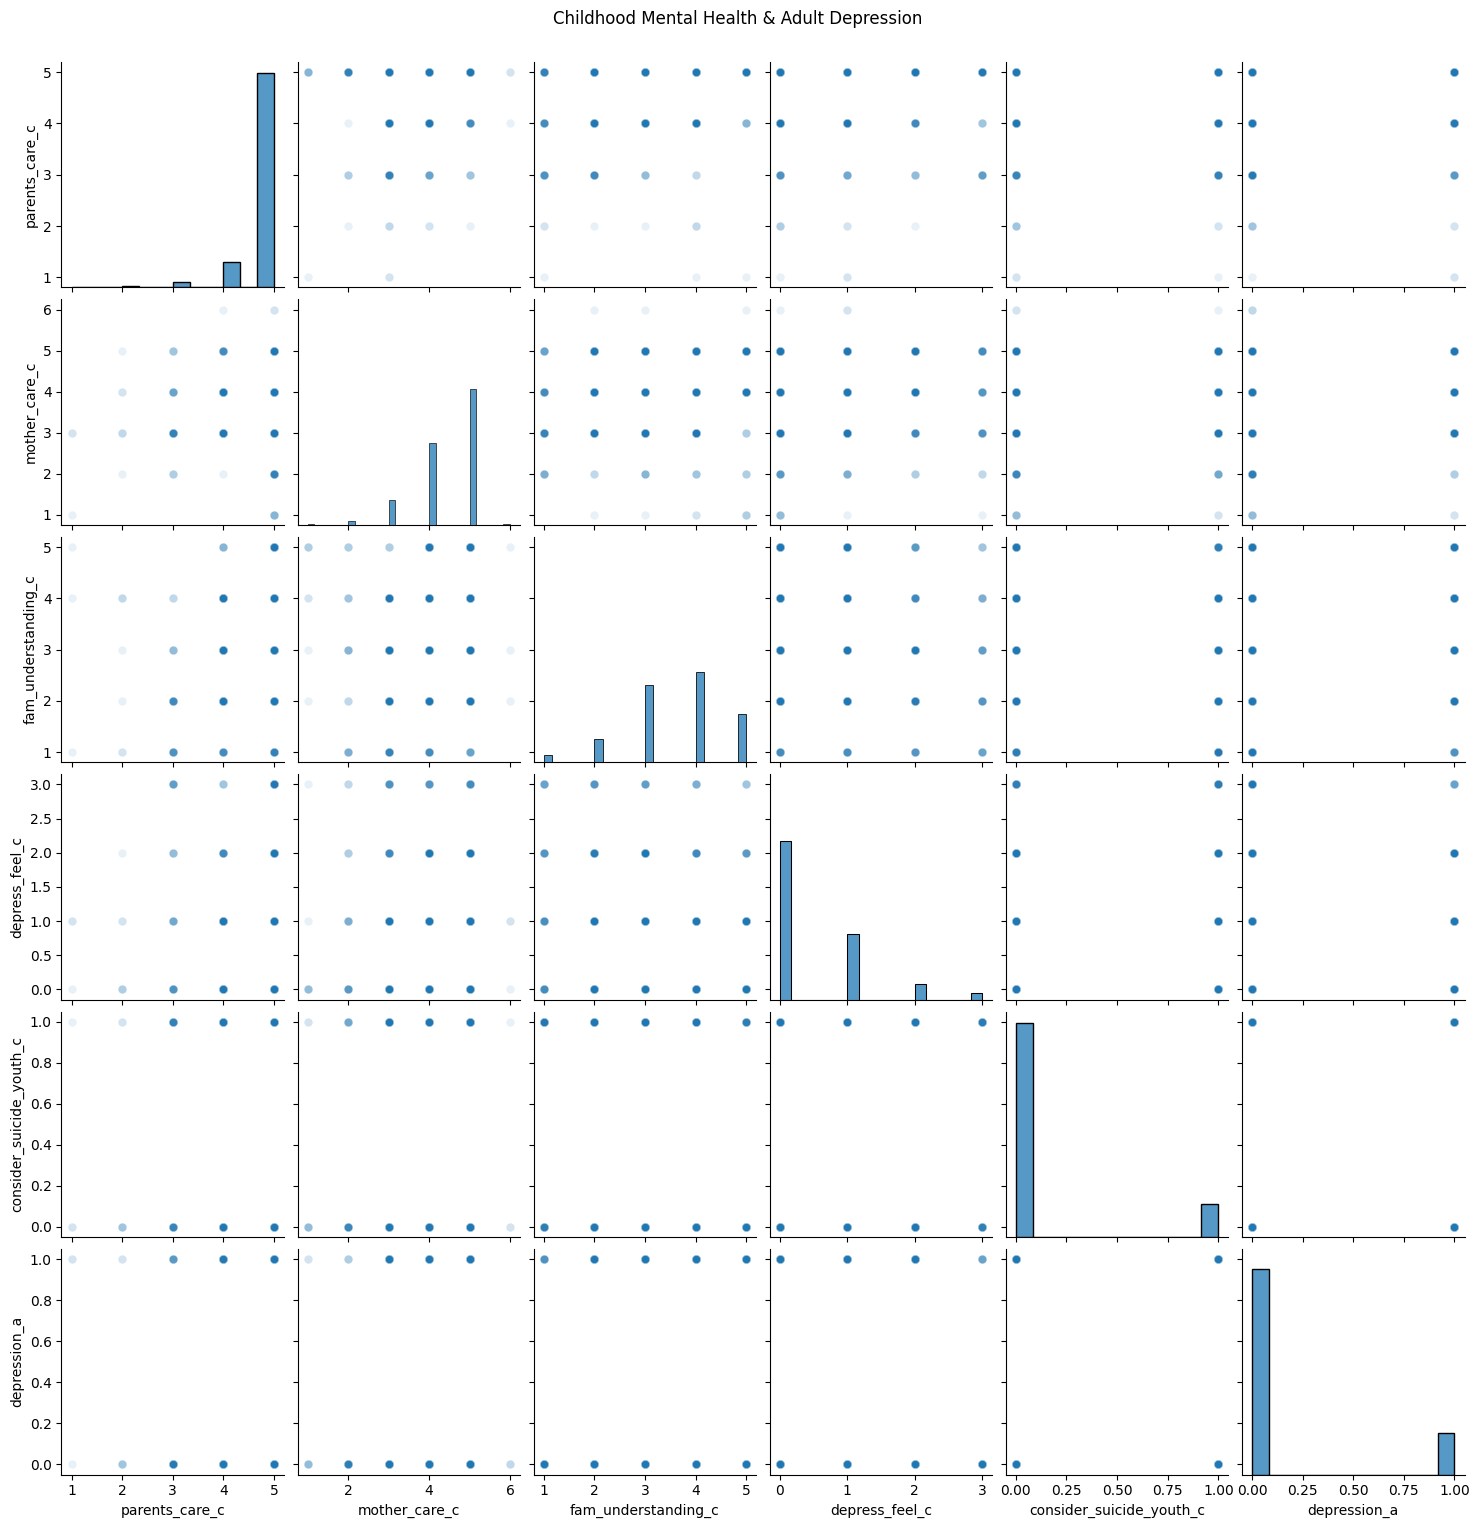

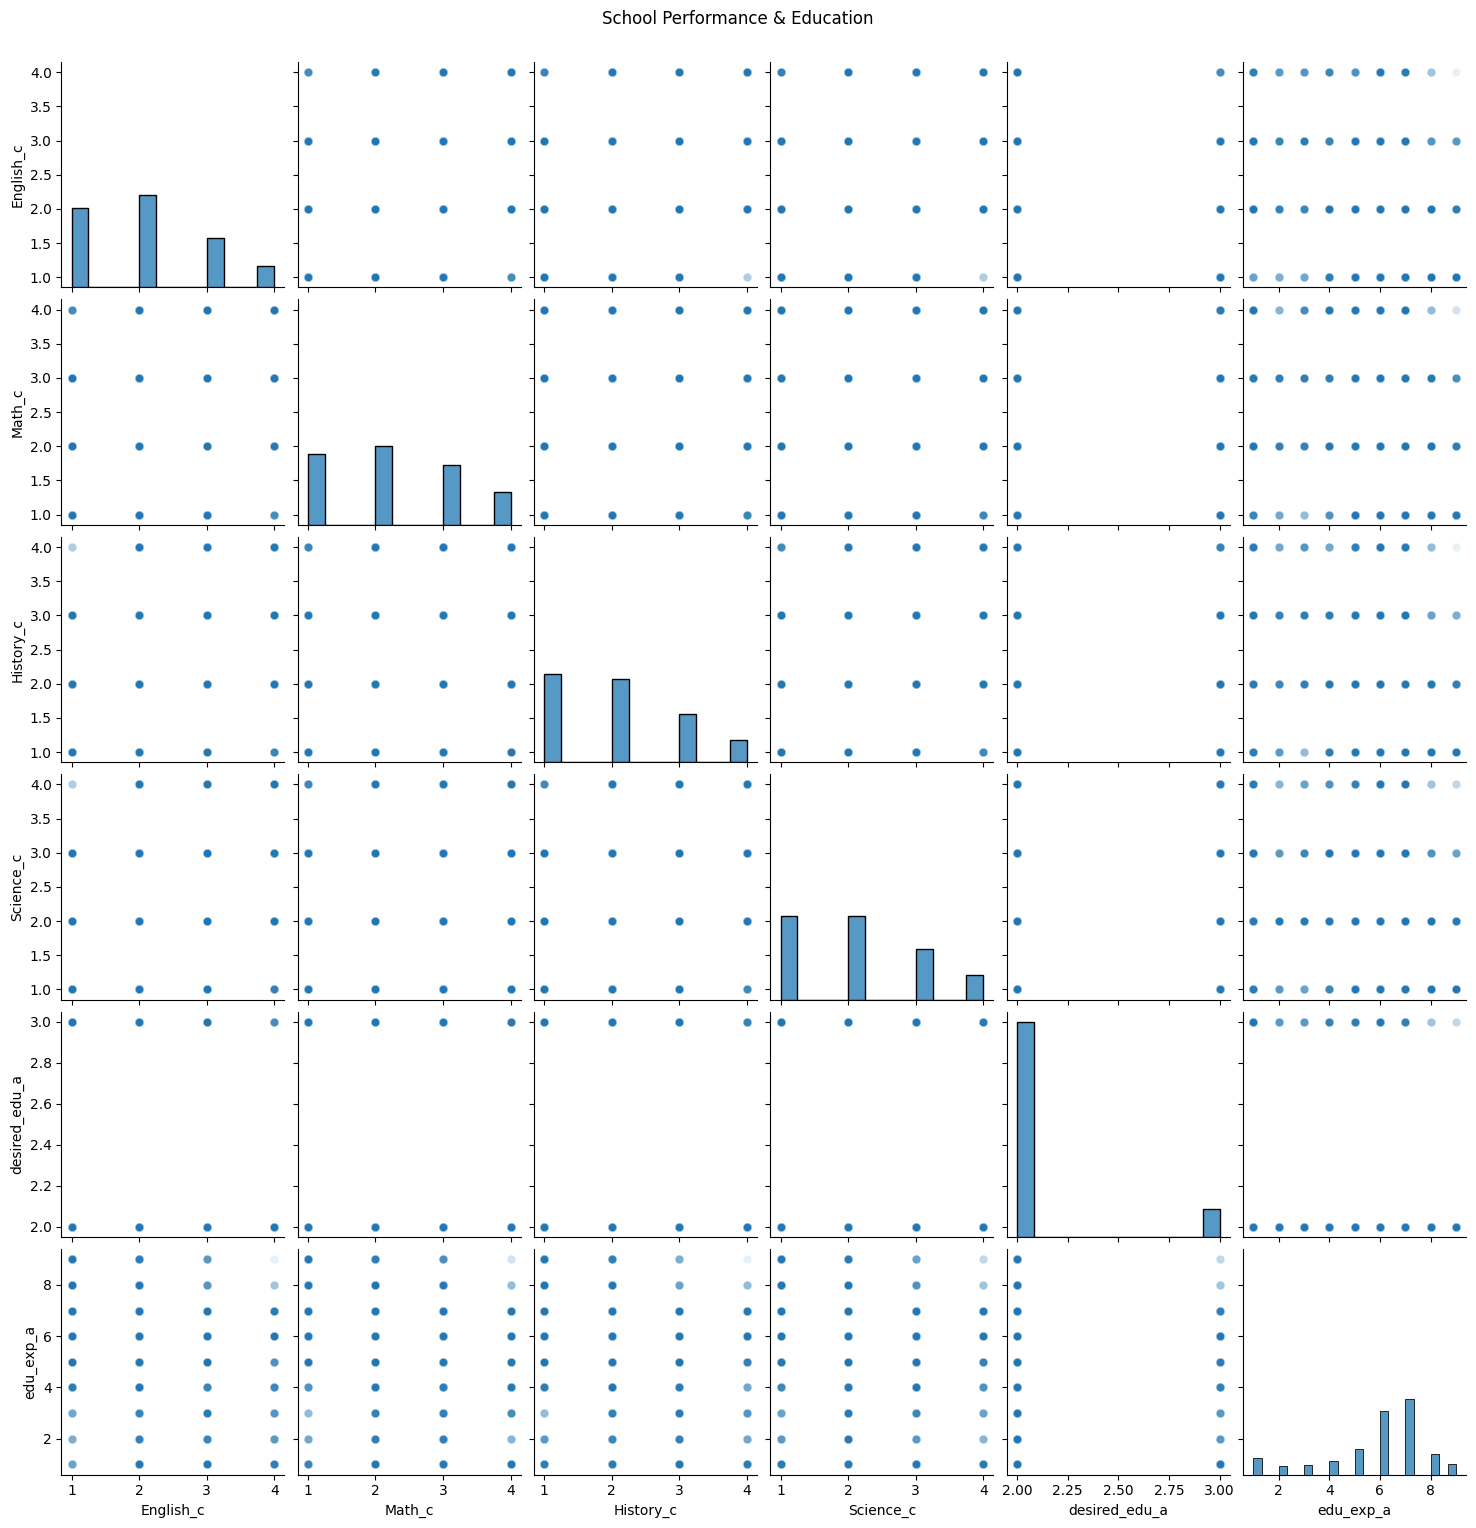

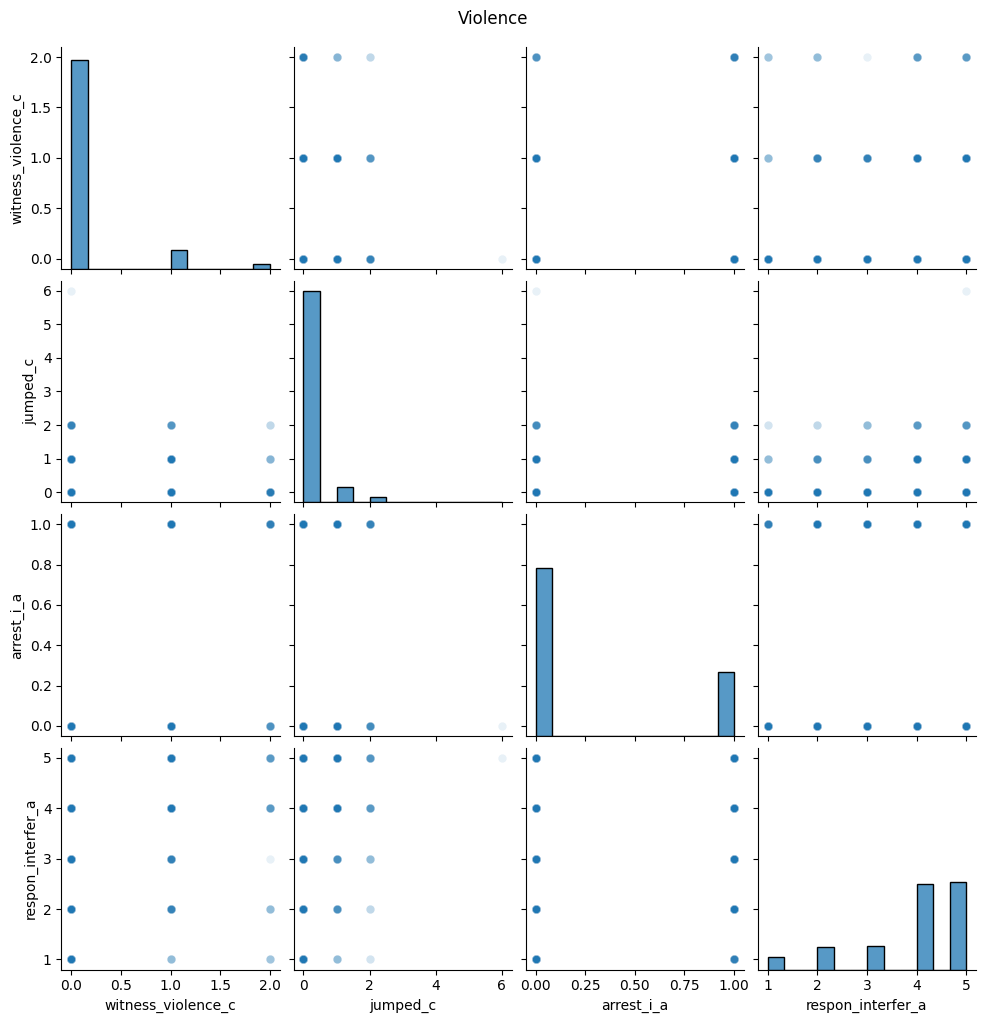

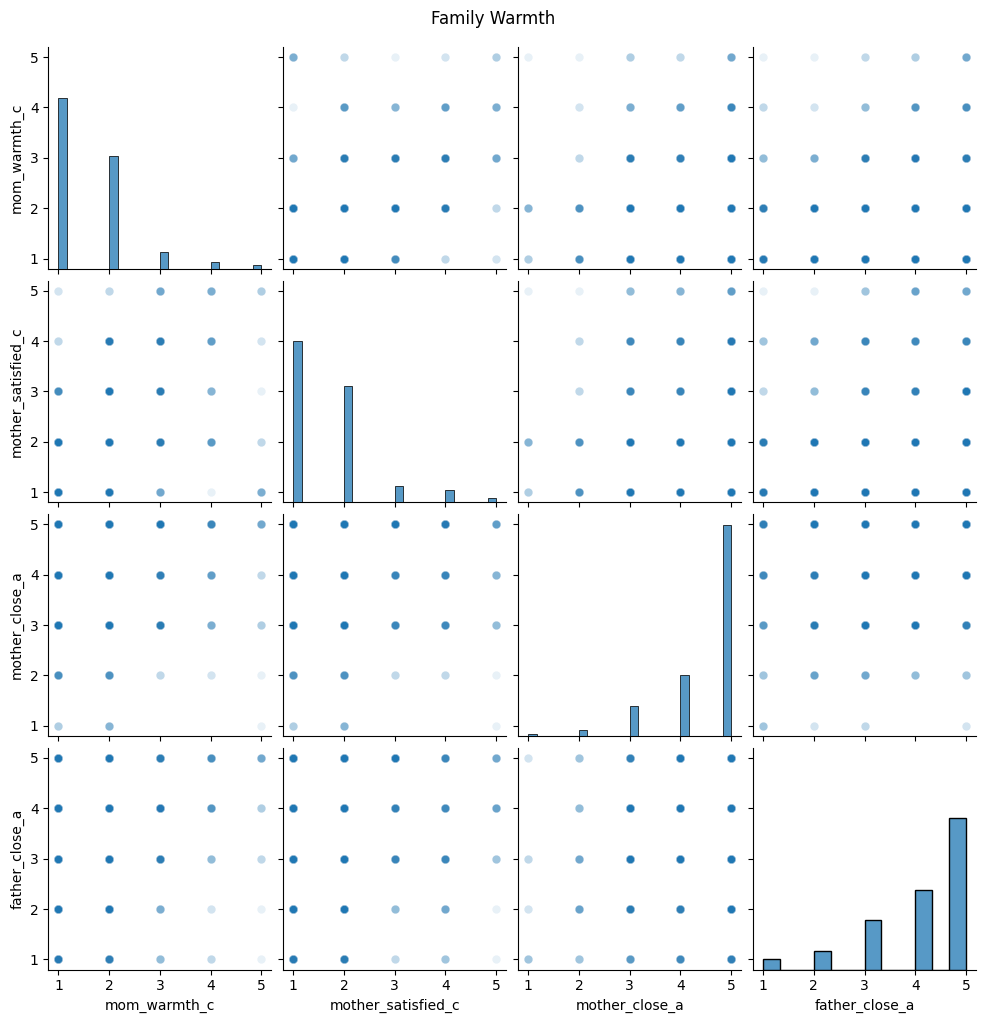

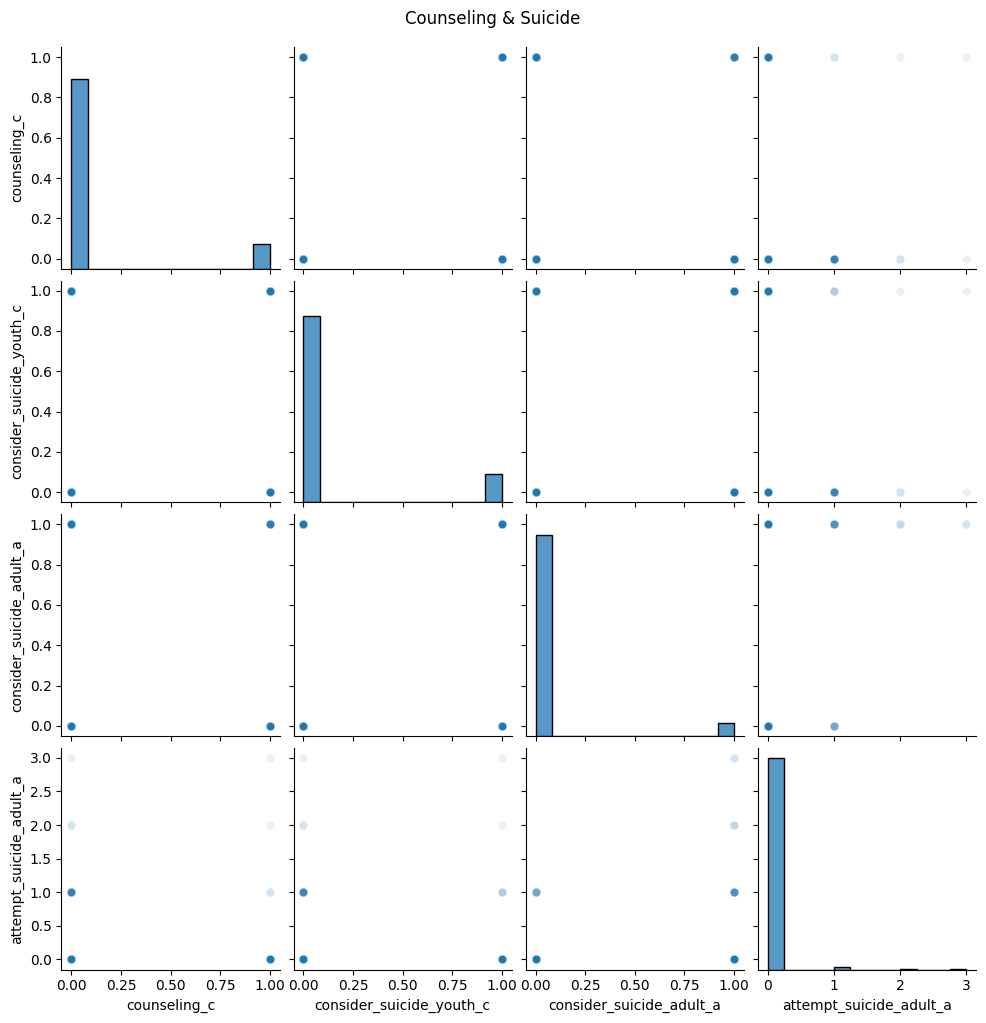

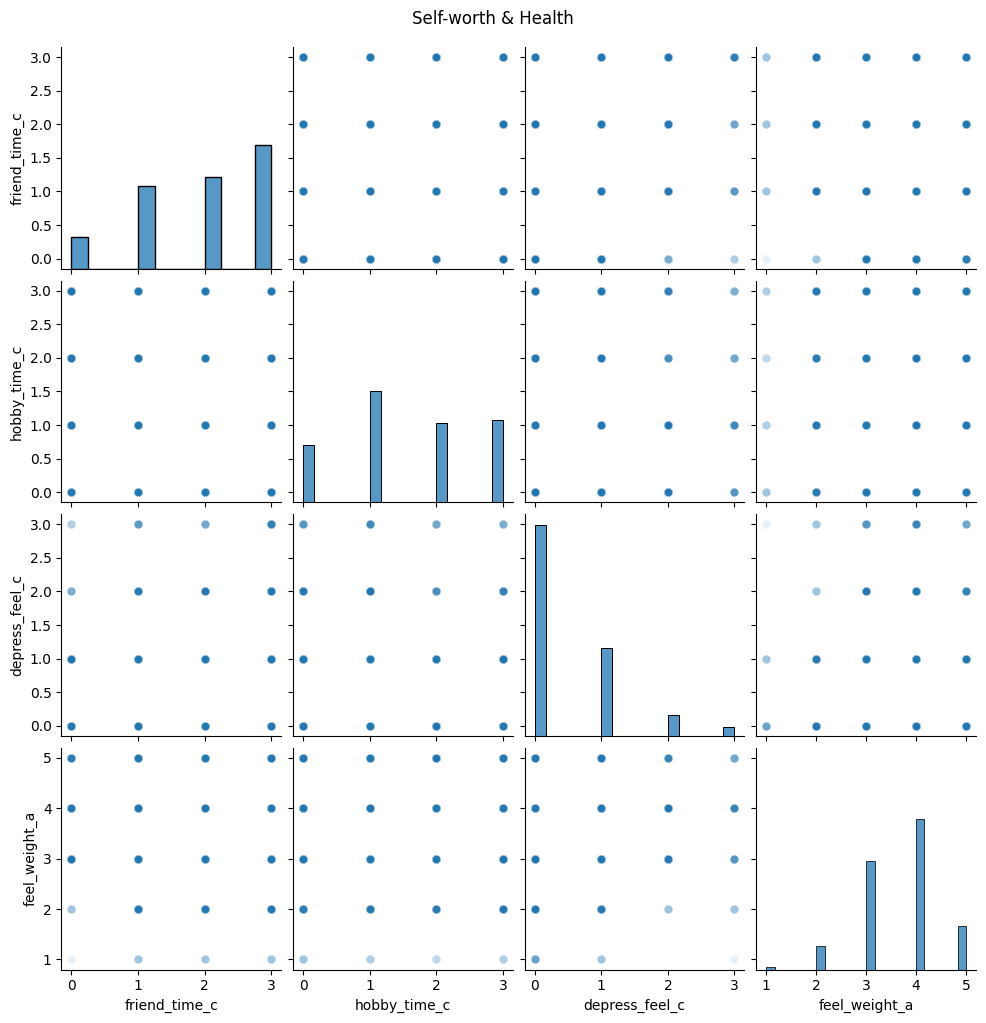

In [14]:
# Childhood Mental Health & Adult Depression
subset_1 = sub_df[['parents_care_c', 'mother_care_c', 'fam_understanding_c', 
                   'depress_feel_c', 'consider_suicide_youth_c', 'depression_a']]

# School Performance & Education
subset_2 = sub_df[['English_c', 'Math_c', 'History_c', 'Science_c', 'desired_edu_a', 'edu_exp_a']]

# Violence
subset_3 = sub_df[['witness_violence_c', 'jumped_c', 'arrest_i_a', 'respon_interfer_a']]

# Family Warmth
subset_4 = sub_df[['mom_warmth_c', 'mother_satisfied_c', 'mother_close_a', 'father_close_a']]

# Counseling & Suicide
subset_5 = sub_df[['counseling_c', 'consider_suicide_youth_c', 
                   'consider_suicide_adult_a', 'attempt_suicide_adult_a']]

# Self-worth & health
subset_6 = sub_df[['friend_time_c', 'hobby_time_c', 'depress_feel_c', 'feel_weight_a']]

g1 = sns.pairplot(subset_1, plot_kws={'alpha': 0.1})
g1.figure.suptitle("Childhood Mental Health & Adult Depression", y=1.02)

# School Performance & Education
g2 = sns.pairplot(subset_2, plot_kws={'alpha': 0.1})
g2.figure.suptitle("School Performance & Education", y=1.02)

# Violence
g3 = sns.pairplot(subset_3, plot_kws={'alpha': 0.1})
g3.figure.suptitle("Violence", y=1.02)

# Family Warmth
g4 = sns.pairplot(subset_4, plot_kws={'alpha': 0.1})
g4.figure.suptitle("Family Warmth", y=1.02)

# Counseling & Suicide
g5 = sns.pairplot(subset_5, plot_kws={'alpha': 0.1})
g5.figure.suptitle("Counseling & Suicide", y=1.02)

# Self-worth & Health
g6 = sns.pairplot(subset_6, plot_kws={'alpha': 0.1})
g6.figure.suptitle("Self-worth & Health", y=1.02)

We will then visualize the correlation matrix for all numeric variables in the dataset. Our heatmap will identify patterns of association and variable relationships that may influence our interpretation of the dataset and implementation of the model.

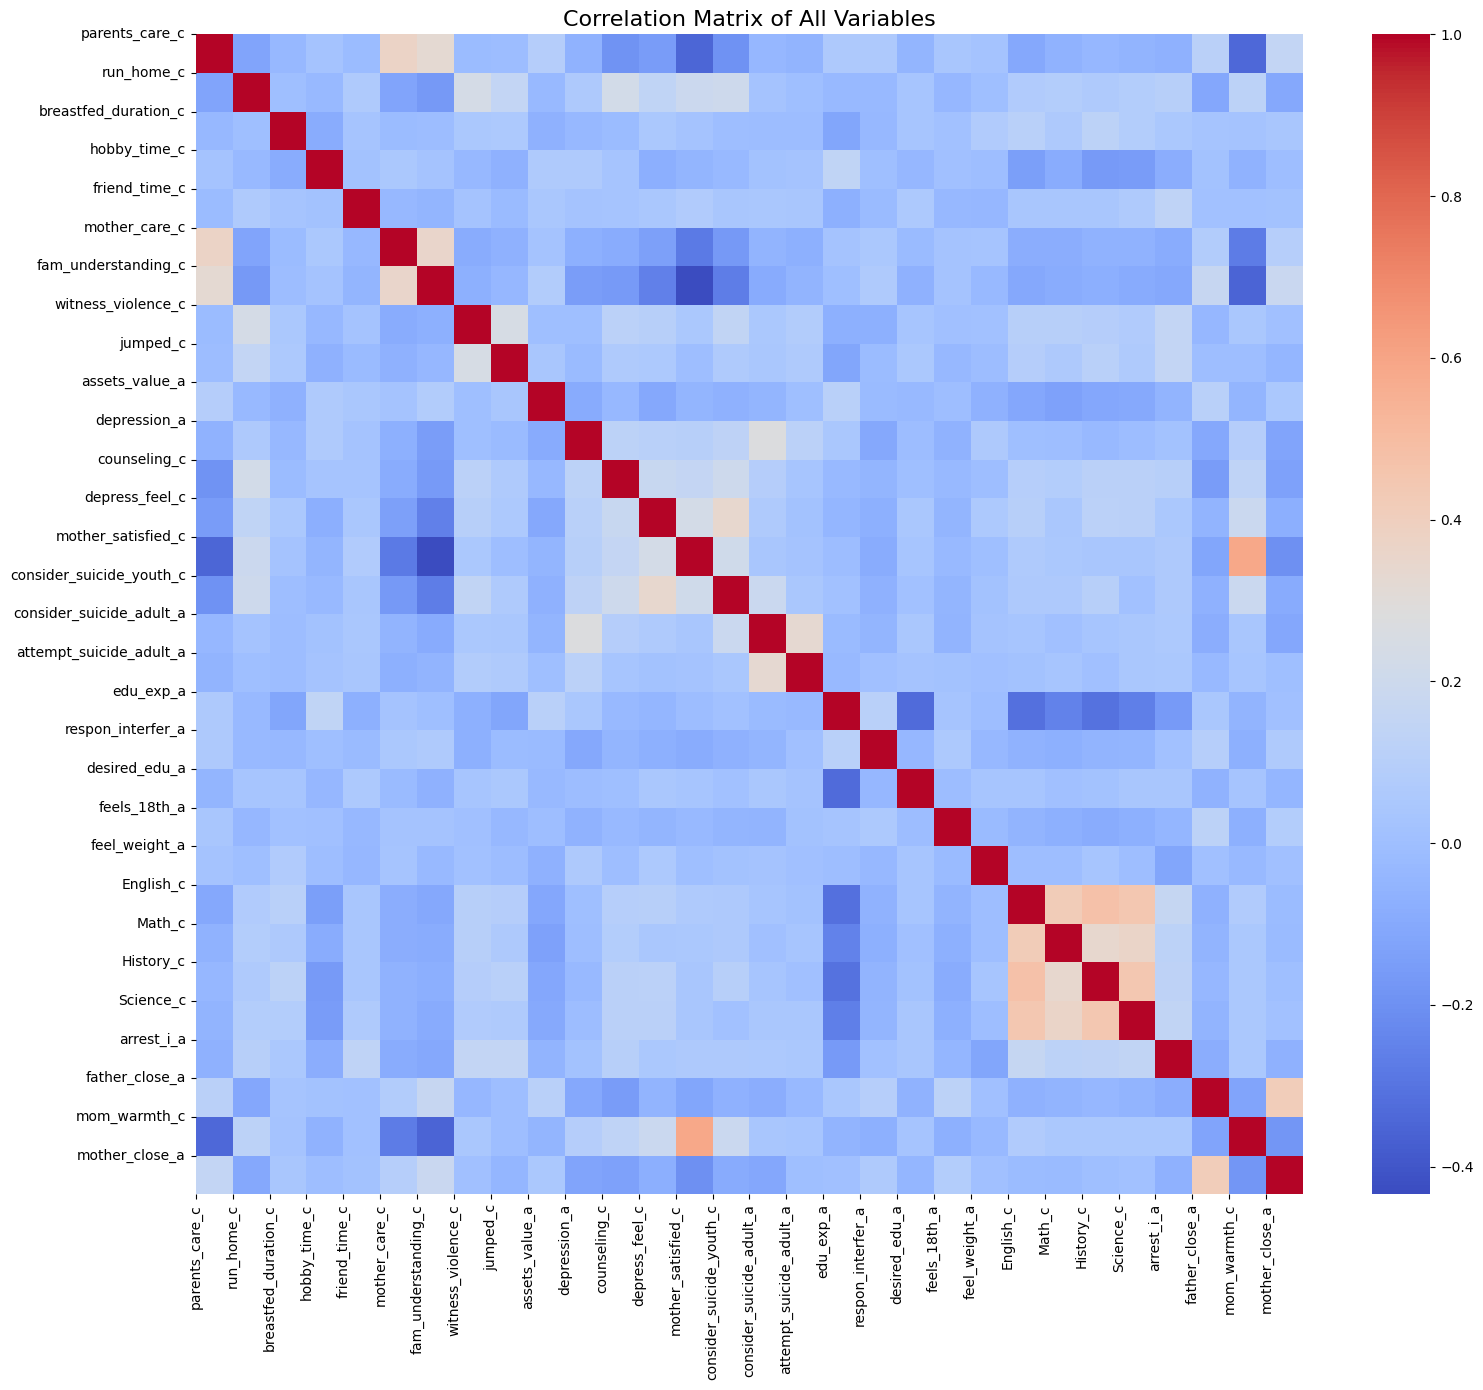

In [15]:
corr_matrix = sub_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index, rotation=0)

plt.title("Correlation Matrix of All Variables", fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
#Does Higher Levels of parental care are associated with lower levels of depression in adulthood?
Parental_care_X = sub_df['parents_care_c']
Depression_Y = sub_df['depression_a']
sub_df_cleaned = sub_df.dropna(subset=['parents_care_c', 'depression_a'])
correlation, p_value = stats.pearsonr(sub_df_cleaned['parents_care_c'], sub_df_cleaned['depression_a'])
print(f"Correlation between parental care and depression: {correlation:.2f}, p-value: {p_value:.3f}")

Correlation between parental care and depression: -0.06, p-value: 0.014


The Correlation Coefficient value of -0.06 indicates a very weak negative correlation between parental care and depression,suggesting that higher levels of parental care are not strongly associated with lower levels of depression in adulthood.

The p-value of 0.014 indicates that this correlation is not statistically significant at the conventional alpha level of 0.05, meaning we cannot conclude that there is a meaningful relationship between these two variables in this dataset.

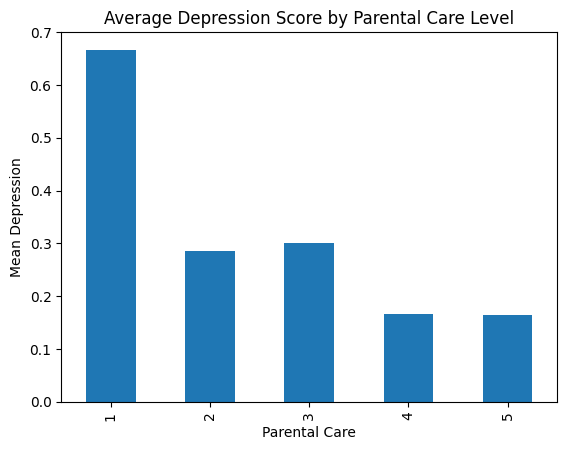

In [17]:
# Plotting the average depression score by parental care level
sub_df_cleaned.groupby('parents_care_c')['depression_a'].mean().plot(kind='bar')
plt.title("Average Depression Score by Parental Care Level")
plt.xlabel("Parental Care")
plt.ylabel("Mean Depression")
plt.show()

We will apply Principal Component Analysis with two components to reduce the dataset's 30 dimensions into a 2 dimensional space. We will then apply coloring based on different variables that we deem important in causing variability.

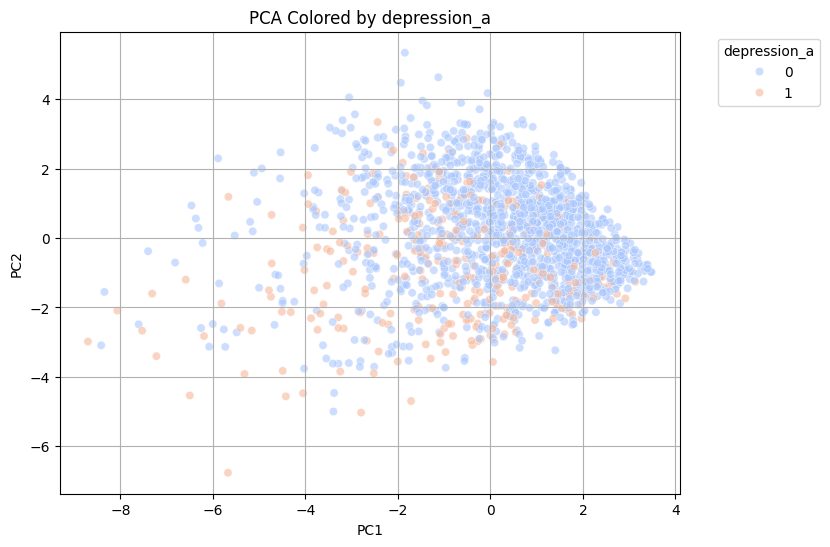

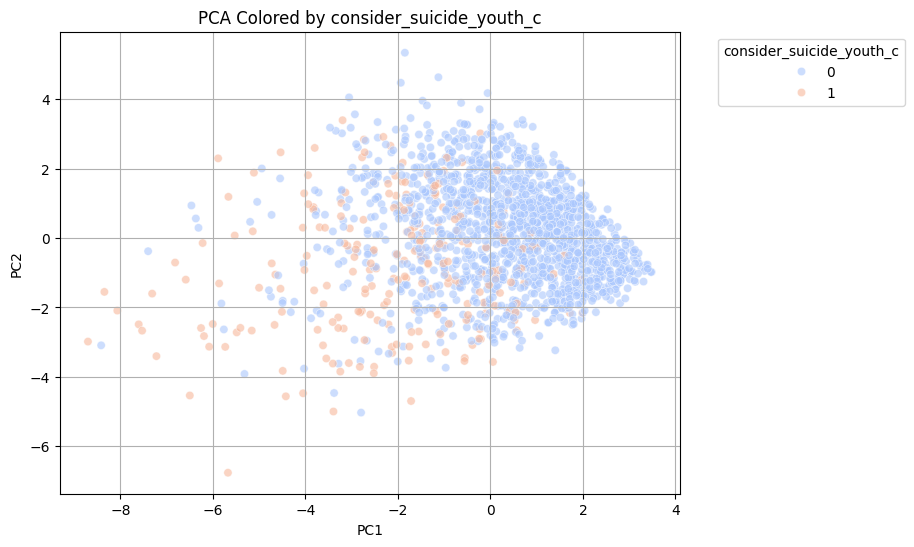

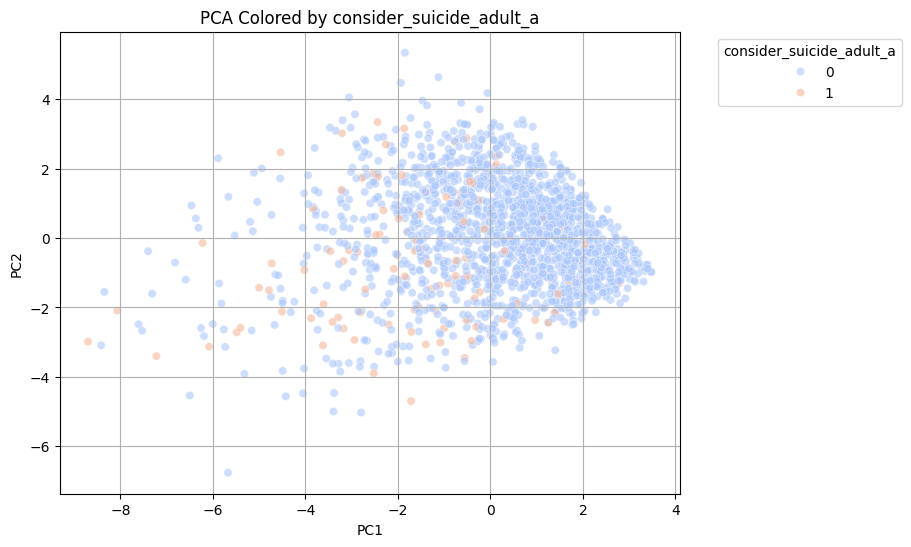

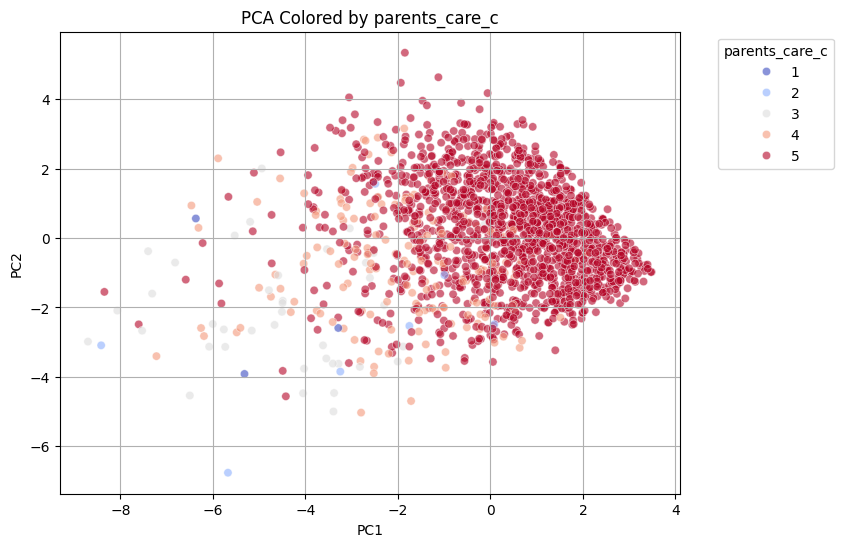

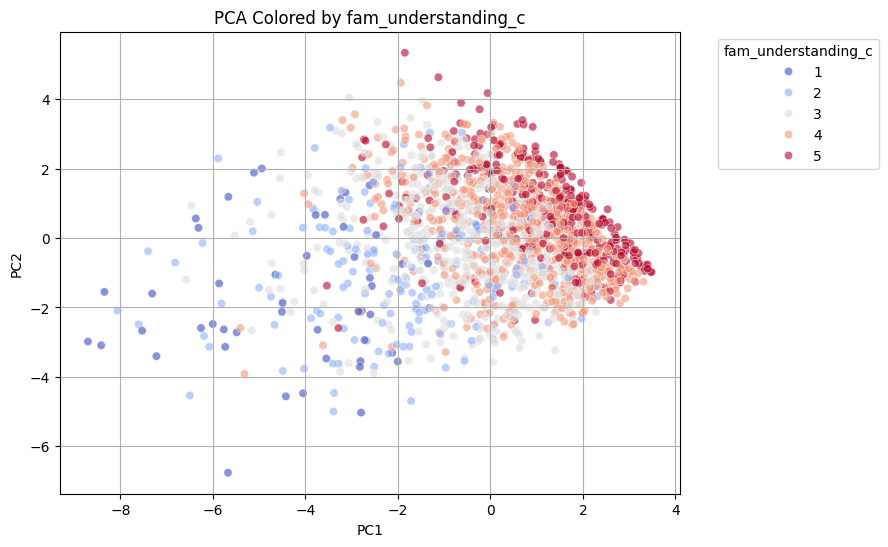

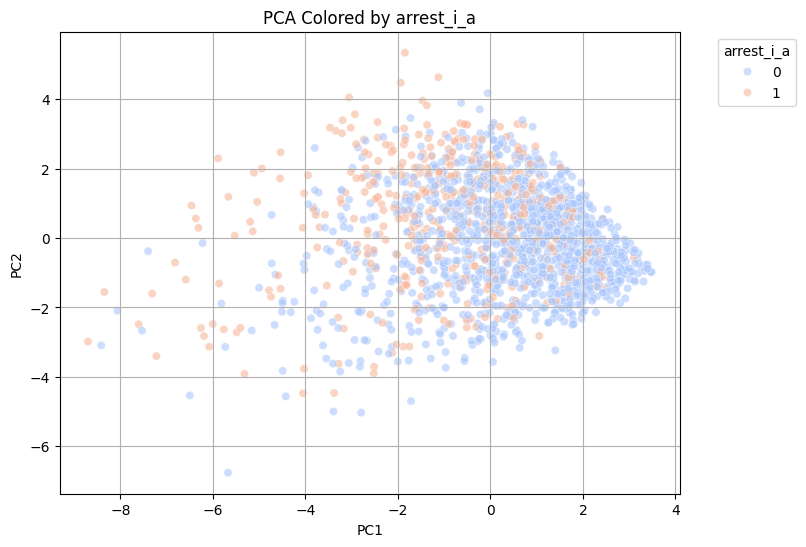

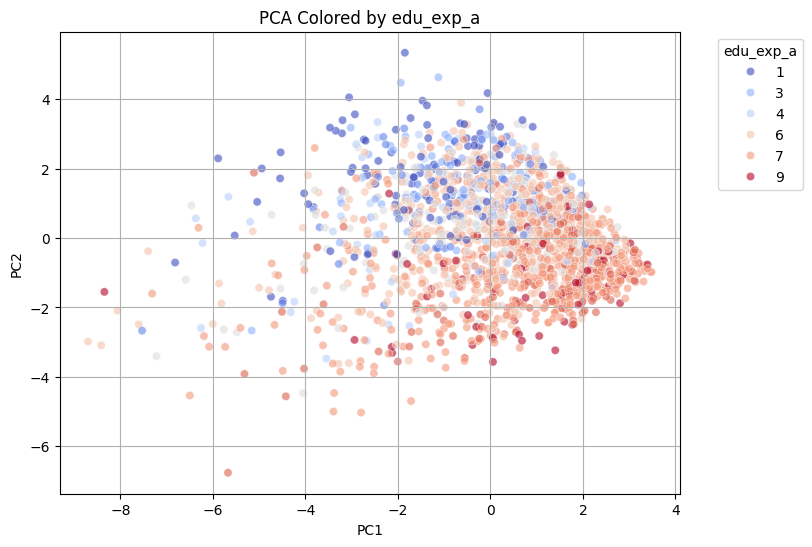

In [18]:
scaler = StandardScaler()
scaled = scaler.fit_transform(sub_df)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

color_vars = ['depression_a', 'consider_suicide_youth_c', 'consider_suicide_adult_a',
              'parents_care_c', 'fam_understanding_c', 'arrest_i_a', 'edu_exp_a']

for var in color_vars:
    mask = sub_df[var].notna()
    color = sub_df.loc[mask, var]
    
    scaled = scaler.fit_transform(sub_df.loc[mask])
    pca_result = pca.fit_transform(scaled)
    
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
    pca_df['color'] = color.values
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='PC1', y='PC2', hue='color', data=pca_df, palette='coolwarm', alpha=0.6)
    plt.title(f'PCA Colored by {var}')
    plt.grid(True)
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

Based on a visual analysis of the PCA graphs, it appears that edu_exp_a, fam_understanding_c, and consider_suicide_youth create relatively distinct clusters among the overall PCA shape. These variables could be significantly influencing the variability among survey responses. 

We will use a bar chart to convey the relationship between reported parental care level and reported mental health score based on depression diagnosis, feelings of depression, and received counseling.

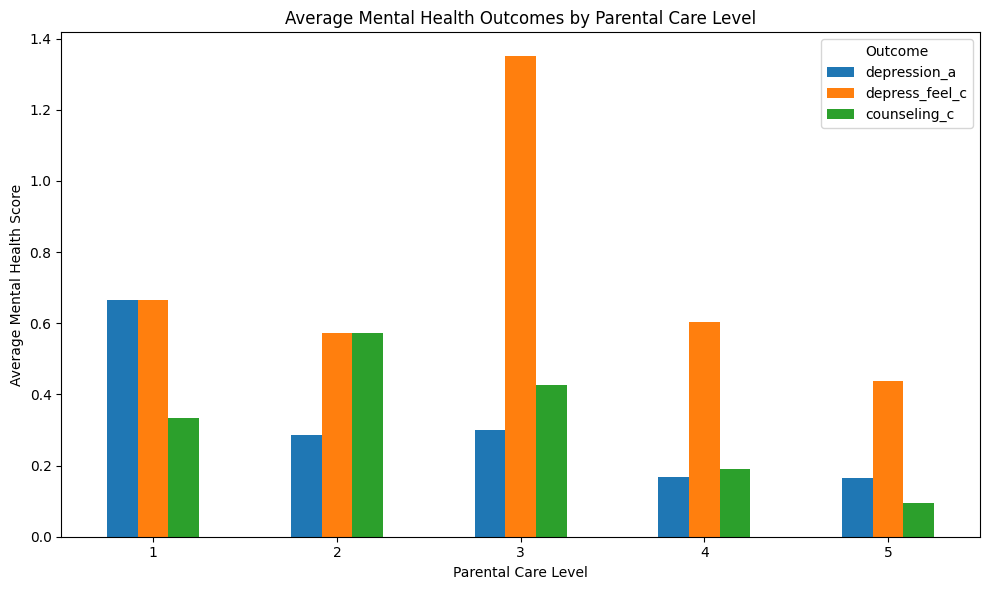

,depression_a,depress_feel_c,counseling_c
parents_care_c,,,
1,0.666667,0.666667,0.333333
2,0.285714,0.571429,0.571429
3,0.300000,1.350000,0.425000
4,0.166667,0.603448,0.189655
5,0.164540,0.438549,0.095366


In [19]:
parent_care_depression = sub_df.groupby('parents_care_c')[['depression_a', 'depress_feel_c', 'counseling_c']].mean()
parent_care_depression.plot(kind='bar', figsize=(10, 6))
plt.title('Average Mental Health Outcomes by Parental Care Level')
plt.ylabel('Average Mental Health Score')
plt.xlabel('Parental Care Level')
plt.xticks(rotation=0)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()
parent_care_depression


We can see that as the level of parental care increases, the overall need for counseling and feelings of depression decrease, demonstrating the emotional effects of parental involvement.

## Modeling

In this section, we use machine learning models to predict adult mental health outcomes using features representing early-life emotional support. We start with a Support Vector Machine (SVM) model and then compare it to a Random Forest Classifier.

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
# Define input features (early-life factors) and target (adult depression)
X = sub_df[['parents_care_c', 'breastfed_duration_c', 'hobby_time_c', 'fam_understanding_c', 'mom_warmth_c']]
y = sub_df['depression_a']  # target: adult depression (0 or 1)

### Support Vector Machine Model
We create an SVM pipeline that scales the features then applies a linear SVC classifier. We enable class_weight='balanced' to compensate for the fact that the depressed class (1) is much smaller than the non-depressed class (0) in our training data. Without this, an unbalanced classifier tended to predict only the majority class.

In [ ]:
# Build a pipeline for SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', class_weight='balanced', random_state=42))
])

svm_pipeline.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Predictions
y_train_pred = svm_pipeline.predict(X_train)
y_test_pred = svm_pipeline.predict(X_test)

# Evaluate performance
print("SVM Train Performance:\n", classification_report(y_train, y_train_pred, digits=3))
print("SVM Test Performance:\n", classification_report(y_test, y_test_pred, digits=3))

SVM Train Performance:
               precision    recall  f1-score   support

           0      0.877     0.650     0.747       997
           1      0.241     0.550     0.335       202

    accuracy                          0.633      1199
   macro avg      0.559     0.600     0.541      1199
weighted avg      0.770     0.633     0.677      1199

SVM Test Performance:
               precision    recall  f1-score   support

           0      0.890     0.685     0.775       426
           1      0.280     0.591     0.380        88

    accuracy                          0.669       514
   macro avg      0.585     0.638     0.577       514
weighted avg      0.786     0.669     0.707       514



After fitting the SVM model, we output the classification reports for both the training set and the test set. The report includes precision, recall, and F1-score for each class (0 = not depressed, 1 = depressed), as well as overall accuracy and macro averages. Interpreting SVM Results: On the training data, the balanced SVM likely achieves decent recall for the depressed class but may produce some false positives to do so. On the test data (unseen individuals), we examine whether the model generalizes:
Accuracy: Given the class imbalance, accuracy alone is not very informative (predicting all “not depressed” yields ~83% accuracy). Instead, we look at recall and precision for class 1 (depressed).
Recall (Sensitivity) for class 1: How many of the actual depressed individuals did the model identify? We expect a relatively moderate recall (the model should find a reasonable portion of depressed cases thanks to class balancing).
Precision for class 1: If the model predicts someone is depressed, what is the probability it’s correct? This might be lower, indicating some false alarms, which is acceptable if we want higher recall.
Class 0 performance: This is the majority class. With class balancing, the model will sacrifice some precision/recall on class 0 to improve identifying class 1. We expect class 0 accuracy to drop slightly compared to a naive model, as the model will sometimes predict “depressed” for people who are not.

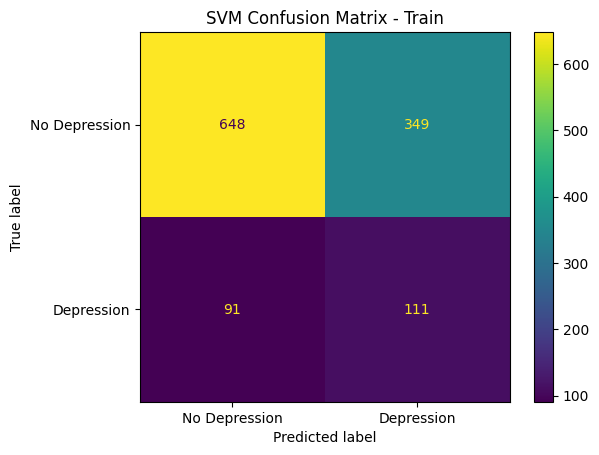

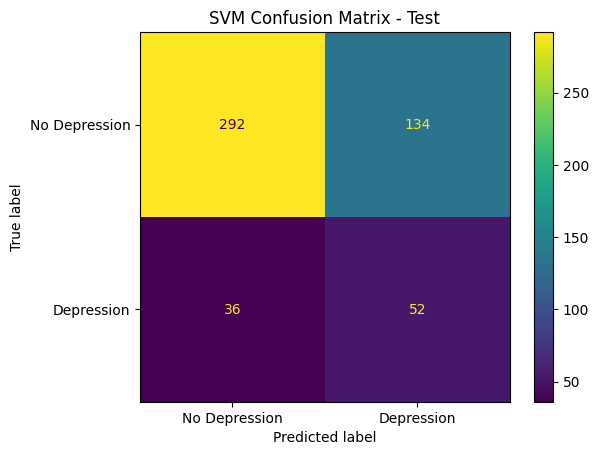

In [ ]:
# Confusion matrices for SVM
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['No Depression','Depression'])
plt.title("SVM Confusion Matrix - Train")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['No Depression','Depression'])
plt.title("SVM Confusion Matrix - Test")
plt.show()


These confusion matrix plots show how many individuals were correctly or incorrectly classified in each class. For instance, in the test set matrix, the top-left cell will be the number of non-depressed individuals correctly predicted as non-depressed (true negatives), the bottom-right is depressed individuals correctly predicted (true positives), the top-right is non-depressed misclassified as depressed (false positives), and bottom-left is depressed individuals missed by the model (false negatives). SVM Performance Summary: The SVM model was able to identify a substantial portion of the adults with depression, but it also flagged a number of non-depressed people as at risk (false positives). In our results, SVM’s recall for the depressed class was around 0.5-0.6 (meaning it caught ~50-60% of true cases). Precision for the depressed class was lower (around 0.2-0.3), reflecting that many of its “depression” predictions were incorrect. This is a common trade-off when using class_weight='balanced': the model becomes more sensitive to finding the minority class, at the expense of specificity. The overall accuracy of the SVM on the test set was about 53%. While this seems low, it is actually better than the trivial 17% precision/0% recall one would get by always predicting “no depression.” The model’s macro average F1-score (~0.55) indicates a balance between classes, which is an improvement over an unbalanced approach. Notably, the SVM’s performance on the training data was similar to its test performance (it did not do much better on train than test), suggesting it is not overfitting badly. This makes sense for a linear model with only a few features – it likely underfits slightly if anything, given the complexity of human psychology, but it’s relatively stable.

## Second Analysis You Did - Give it a better title

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.